The algorithm converged to the desired accuracy.


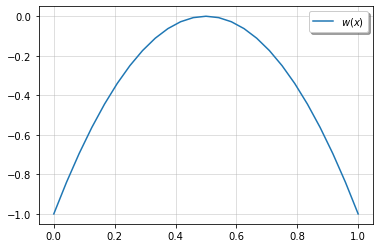

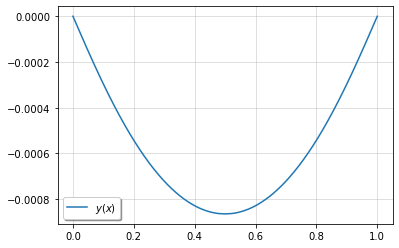

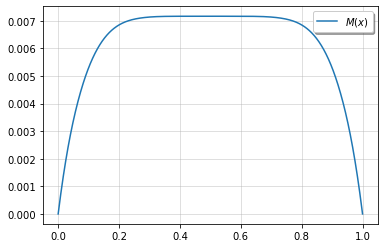

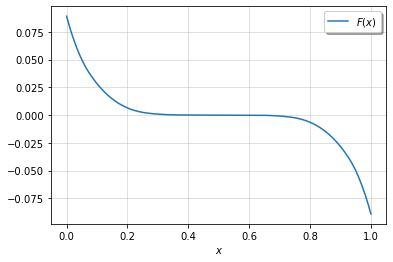

In [1]:
# *******************************************
# Bending moment and shear forces definitions
# date: 22/10/2020
# author: aleksander.grm@fpp.uni-lj.si

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# system constants
w = 1;
EI = 1;
k = -w/EI
tt = 3 # weight type


# define linear wight w
def wgh(x,s):
    n = x.size
    l = np.linspace(0,1,n)

    if s == 1: # constant
        return k*np.ones(n)
    elif s == 2: # parabolic center 1, boundary 0
        return k*(0.5*0.5*np.ones(n) - np.square(l - 0.5*np.ones(n)))*4
    elif s == 3: # parabolic center 0, boundary 1
        return k*(1 + (np.square(l-0.5*np.ones(n)) - 0.5*0.5*np.ones(n))*4)
    else:
        return np.zeros(n)


# define beam ODE
def fun(x, y):
    # derivatives
    dy0 = y[1]
    dy1 = y[2]
    dy2 = y[3]
    dy3 = wgh(x,tt)
    ret = np.vstack((dy0,dy1,dy2,dy3))
    return ret

# define boundary conditions
# 0th, 1st, 2nd and 3rd derivative BCs
# ya - [ya[0],ya[1],ya[2],ya[3]] = [y(0), dy/dx(0), d^2y/dx^2(0), d^3y/dx^3(0)]
# yb - [yb[0],yb[1],yb[2],yb[3]] = [y(1), dy/dx(1), d^2y/dx^2(1), d^3y/dx^3(1)]

# On both sides moment is 0
# d^2y/dx^2(0) = 0 & d^2y/dx^2(1) = 0
def bc(ya, yb):
    return [ya[0], ya[2], yb[0], yb[2]]

n = 25
x = np.linspace(0, 1, n)
y = np.zeros((4, x.size))

sol = solve_bvp(fun, bc, x, y)

if sol.status != 0:
    print("WARNING: sol.status is %d" % sol.status)
print(sol.message)

plt.figure()
plt.plot(x, wgh(x,tt), label='$w(x)$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)

plt.figure()
plt.plot(sol.x, sol.y[0], label='$y(x)$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)

plt.figure()
plt.plot(sol.x, sol.y[2], label='$M(x)$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)

plt.figure()
plt.plot(sol.x, sol.y[3], label='$F(x)$')
plt.xlabel('$x$')
plt.grid(alpha=0.5)
plt.legend(framealpha=1, shadow=True)

plt.show()    